In [1]:
#imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import re
from wordcloud import WordCloud

<hr>

# Kickstarter Projects: EDA ONLY

### Dataset Link

<hr>

## Data Cleaning & EDA & Feature Engineering

In [2]:
df = pd.read_csv('kickstarter_projects.csv').drop('ID', axis=1)
df

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...
374848,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


In [3]:
# strings and ints
df.dtypes

Name           object
Category       object
Subcategory    object
Country        object
Launched       object
Deadline       object
Goal            int64
Pledged         int64
Backers         int64
State          object
dtype: object

In [4]:
# no null values
df.isnull().sum()

Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [5]:
# 5 diff states
df['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

In [6]:
df.describe()

,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


In [7]:
# only four projects that had a goal of $0
df[df['Goal'] == 0]

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
1085,LOVELAND Round 6: A Force More Powerful,Art,Conceptual Art,United States,2009-11-25 07:54:49,2009-12-04,0,100,6,Successful
33831,"Word-of-mouth publishing: get ""Corruptions"" ou...",Publishing,Fiction,United States,2011-11-07 16:46:52,2011-12-13,0,0,0,Canceled
40294,Nana,Film & Video,Shorts,United States,2012-01-25 07:23:19,2012-03-16,0,0,0,Failed
316197,Bug's Big Adventure: Mexico Edition,Art,Art,Mexico,2016-11-11 16:30:00,2016-11-12,0,16,7,Successful


The "State" column seems to be inconsistent in distinguishing "Successful" vs. "Failed" campaigns in certain edge cases. Do we want to just define success on our own?

In [8]:
df[(df['Goal'] == df['Pledged']) & (df['State'] != 'Successful')].shape

(73, 10)

In [9]:
df[(df['Goal'] <= df['Pledged']) & (df['State'] == 'Failed')].shape

(10, 10)

In [10]:
for col in df.columns:
    print(df[col].value_counts().head(10))
    print('\n')

Name
New EP/Music Development      13
Canceled (Canceled)           13
N/A (Canceled)                11
Music Video                   11
Cancelled (Canceled)          10
New EP / Music Development    10
The Journey                    9
Reflections                    9
Debut Album                    9
A Midsummer Night's Dream      8
Name: count, dtype: int64


Category
Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Name: count, dtype: int64


Subcategory
Product Design    22310
Documentary       16138
Tabletop Games    14178
Music             13339
Shorts            12357
Video Games       11828
Food              11492
Film & Video       9222
Fiction            9168
Fashion            8554
Name: count, dtype: int64


Country
United States     292618
United Kingdom     33671
Canada             14756
Australia        

In [11]:
df[(df['State'] == 'Canceled') & (df['Goal'] <= df['Pledged'])].shape[0] / df[df['State'] == 'Canceled'].shape[0]

0.018012438388686745

In [12]:
df = df[(df['State'] != 'Live') & (df['State'] != 'Suspended') & (df['State'] != 'Canceled')]
df['Success'] = df['Goal'] <= df['Pledged']
df['State'].value_counts()

/tmp/ipykernel_137/1955486209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Success'] = df['Goal'] <= df['Pledged']


State
Failed        197611
Successful    133851
Name: count, dtype: int64

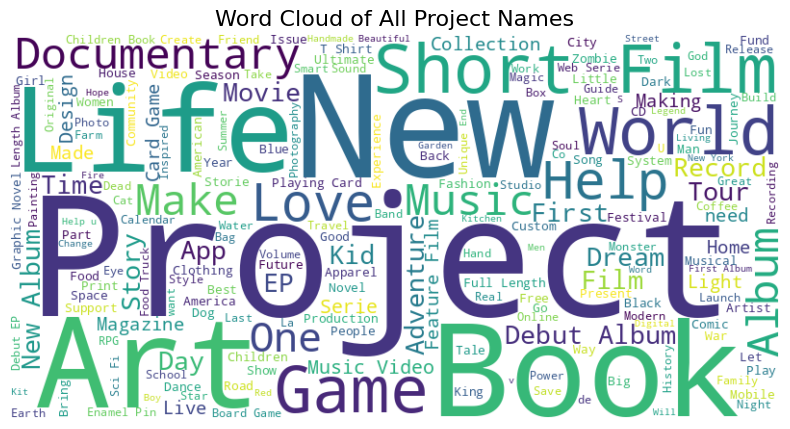

In [18]:
text = " ".join(name for name in df['Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of All Project Names", fontsize=16)
plt.show()

In [13]:
df[df['Success'] == 0]

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Success
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,False
1,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,False
4,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,False
6,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,False
9,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,False
...,...,...,...,...,...,...,...,...,...,...,...
373944,Center Touching Center - A Book of Poetry,Publishing,Publishing,United States,2017-12-19 04:10:24,2017-12-28,3700,0,0,Failed,False
374004,Savage in Limbo,Theater,Theater,Canada,2017-12-19 18:18:45,2018-01-01,2398,160,2,Failed,False
374048,No Fix?,Film & Video,Documentary,United States,2017-12-20 03:14:24,2018-01-01,20000,0,0,Failed,False
374049,No Label In Home Studio - The Future of Music,Music,Music,United States,2017-12-20 03:19:03,2017-12-31,3500,0,0,Failed,False


In [14]:
df[df['Success'] == 1]

,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Success
2,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,True
3,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,True
5,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,True
7,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,True
10,kicey to iceland,Photography,Photography,United States,2009-04-29 06:43:44,2009-06-17,350,1630,31,Successful,True
...,...,...,...,...,...,...,...,...,...,...,...
374310,Propeller Spring 2.0,Games,Games,Austria,2017-12-23 10:14:21,2017-12-26,36,270,36,Successful,True
374400,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,United Kingdom,2017-12-26 13:00:24,2017-12-31,271,545,25,Successful,True
374458,The CHAMPS Are Here!,Fashion,Apparel,United States,2017-12-27 03:52:38,2017-12-31,200,202,6,Successful,True
374530,Kill Them All!,Games,Tabletop Games,United States,2017-12-28 01:48:58,2017-12-30,250,265,7,Successful,True


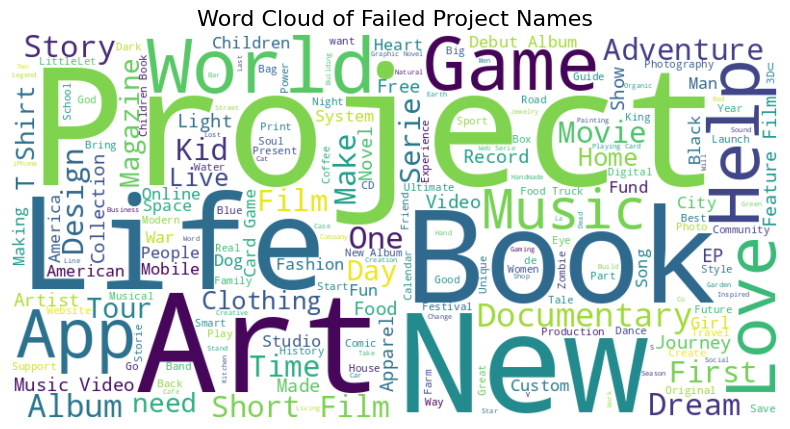

In [19]:
text = " ".join(name for name in df[df['Success'] == 0]['Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Failed Project Names", fontsize=16)
plt.show()

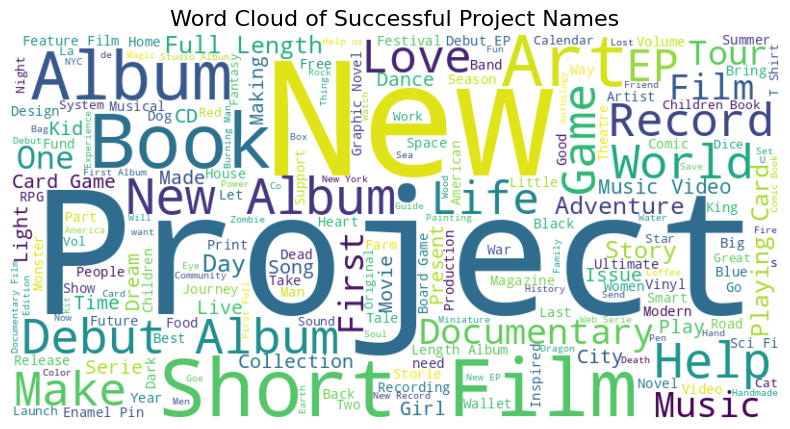

In [20]:
text = " ".join(name for name in df[df['Success'] == 1]['Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Successful Project Names", fontsize=16)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=212b545b-a8a9-4c2a-9e37-373e64737980' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>